In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [5]:
df=pd.read_csv("C:/Users/Admin/OneDrive/Documents/TopMentor/MR/ToyotaCorolla.csv",encoding='latin1')

In [6]:
# Step 3: Initial EDA
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Drop irrelevant columns (e.g., ID, Model) if not useful for modeling
df = df.drop(["Id", "Model"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
# Step 4: Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

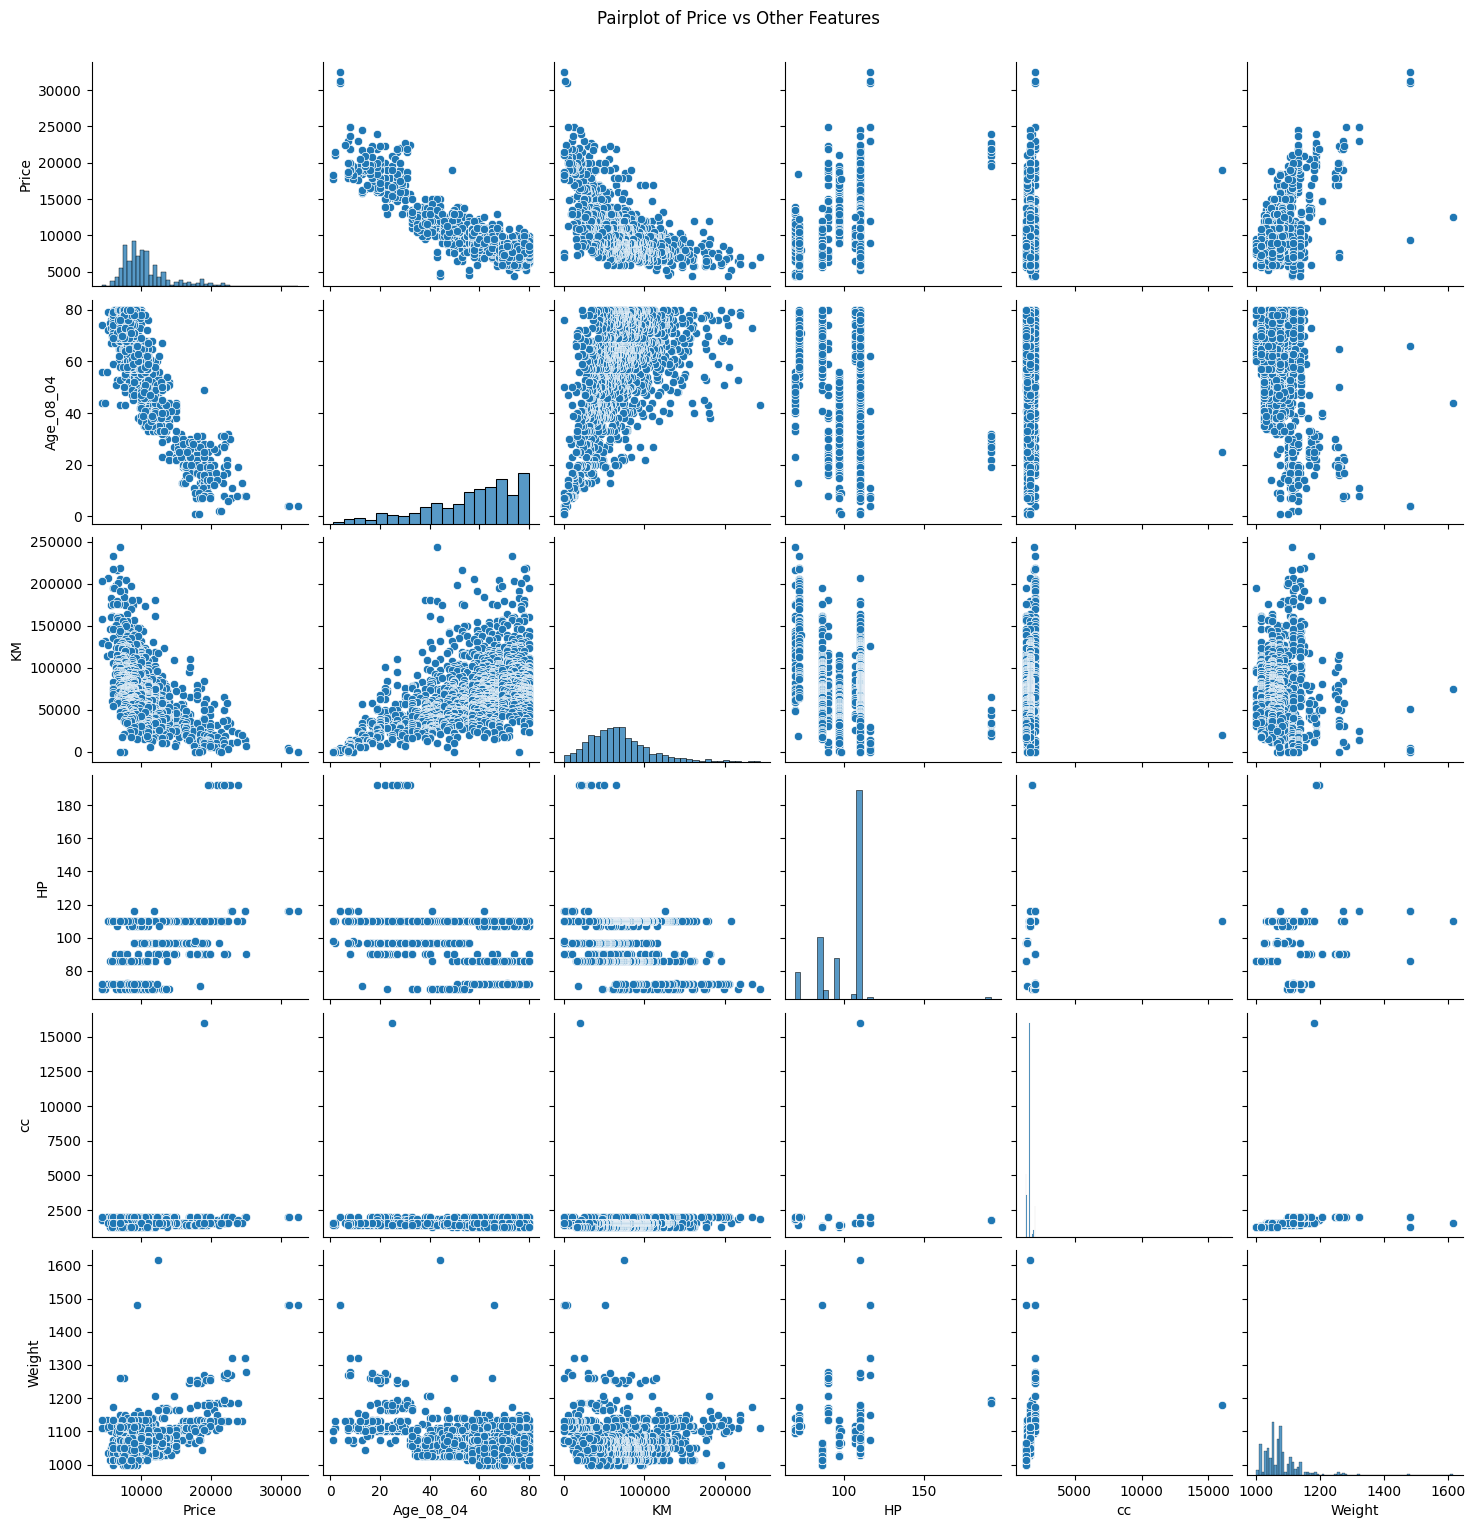

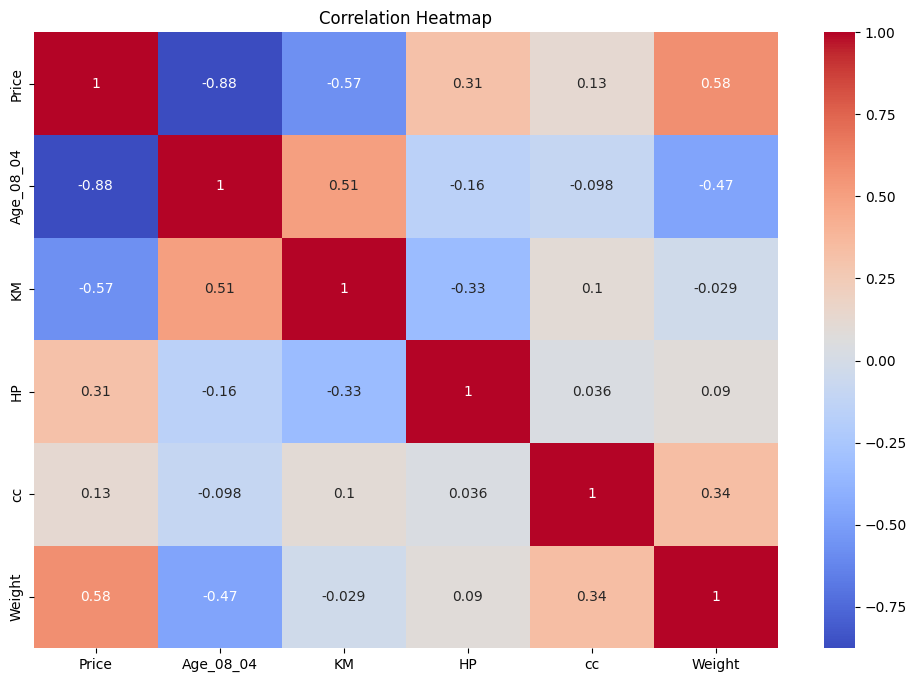

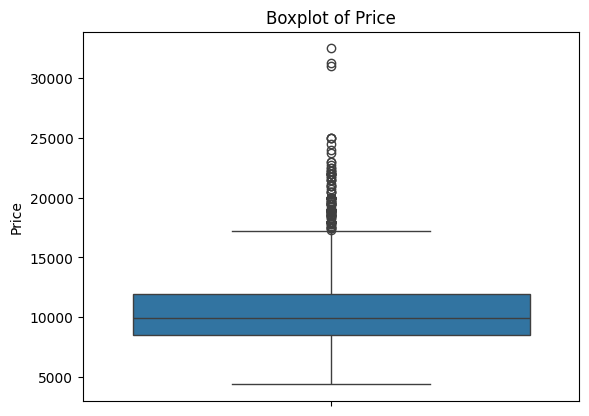

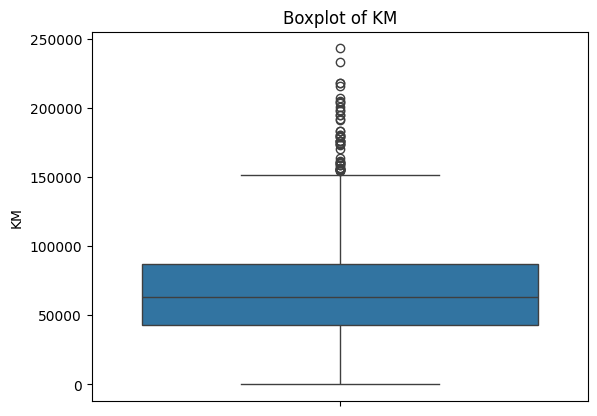

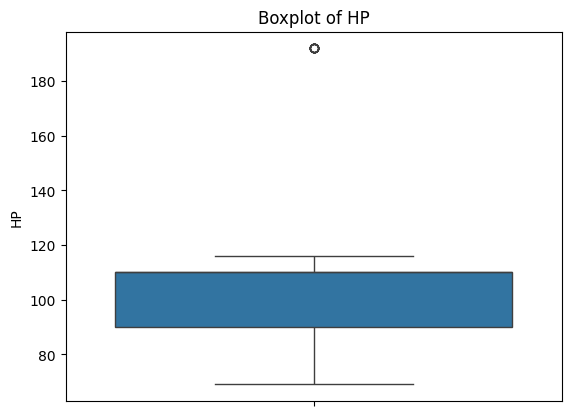

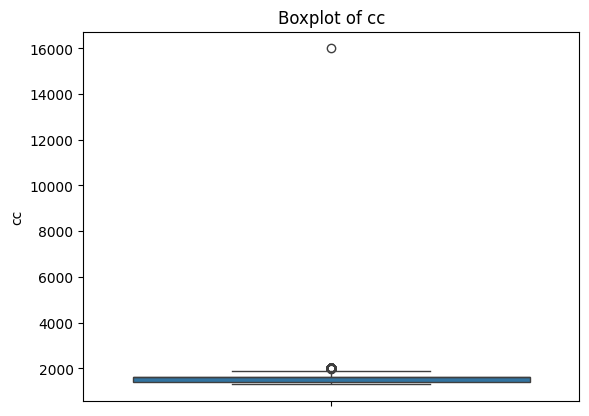

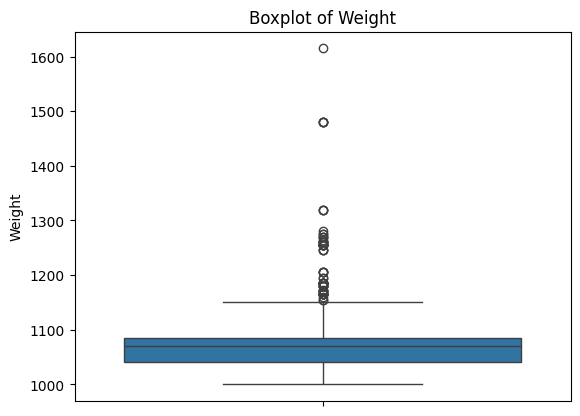

In [8]:
# Step 5: EDA (on original df before encoding)

# Pairplot on selected numeric features
sns.pairplot(df[["Price", "Age_08_04", "KM", "HP", "cc", "Weight"]])
plt.suptitle("Pairplot of Price vs Other Features", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[["Price", "Age_08_04", "KM", "HP", "cc", "Weight"]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for Outliers
for col in ["Price", "KM", "HP", "cc", "Weight"]:
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [9]:
# Step 6: Split Features and Target
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 7: Modeling and Transformations
results = []

# Raw Data Model
model_raw = LinearRegression()
model_raw.fit(X_train, y_train)
pred_raw = model_raw.predict(X_test)
r2_raw = r2_score(y_test, pred_raw)
results.append(["Raw Data", r2_raw])

# Standard Scaled Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
pred_scaled = model_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, pred_scaled)
results.append(["Standard Scaled", r2_scaled])

# Power Transformed Model
pt = PowerTransformer()
X_train_pt = pt.fit_transform(X_train + 1e-5)
X_test_pt = pt.transform(X_test + 1e-5)

model_pt = LinearRegression()
model_pt.fit(X_train_pt, y_train)
pred_pt = model_pt.predict(X_test_pt)
r2_pt = r2_score(y_test, pred_pt)
results.append(["Power Transformed", r2_pt])

In [15]:
import statsmodels.api as sm

# Re-encode categorical variables properly if not already
df_encoded = pd.get_dummies(df, drop_first=True)

# Ensure all data is numeric (no object columns)
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

# Force all X columns to be float64
X = X.astype('float64')
y = y.astype('float64')

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit OLS model
ols_model = sm.OLS(y, X_const).fit()

# Display summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     338.6
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:48:56   Log-Likelihood:                -12072.
No. Observations:                1436   AIC:                         2.423e+04
Df Residuals:                    1393   BIC:                         2.446e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -118.4343      3.443  

In [12]:
# Step 9: R² Comparison Table
r2_df = pd.DataFrame(results, columns=["Model", "R² Score"])
print("\nR² Comparison Table:")
print(r2_df)



R² Comparison Table:
               Model  R² Score
0           Raw Data  0.886759
1    Standard Scaled  0.886759
2  Power Transformed  0.920723


In [13]:
# Step 10: Key Insights
for name, score in results:
    print(f"{name}: R² Score = {score:.4f}")

Raw Data: R² Score = 0.8868
Standard Scaled: R² Score = 0.8868
Power Transformed: R² Score = 0.9207
